In [2]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [3]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        images=[]
        #reader = np.genfromtxt(training_file, delimiter=',', dtype=str, skip_header=1)
        reader = np.loadtxt(training_file, delimiter=',', skiprows=1)
        labels = reader[0:, 0].astype(np.float)
        values = reader[0:, 1:].astype(np.float)
        for val in values:
            val = np.array_split(val, 28, axis=0)
            images.append(val)
        images=np.array(images).astype(np.float)  
      # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [4]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True
    )

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1.0/255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=25, activation='softmax')]
    )

# Compile Model. 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),epochs=10, verbose=1, validation_data=validation_datagen.flow(testing_images, testing_labels), steps_per_epoch=int(len(training_images)/32))

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/10
857/857 [==============================] - 101s 118ms/step - loss: 2.5937 - accuracy: 0.2047 - val_loss: 1.8246 - val_accuracy: 0.3687
Epoch 2/10
857/857 [==============================] - 97s 114ms/step - loss: 1.8098 - accuracy: 0.4219 - val_loss: 1.1134 - val_accuracy: 0.6148
Epoch 3/10
857/857 [==============================] - 98s 114ms/step - loss: 1.4365 - accuracy: 0.5329 - val_loss: 0.7785 - val_accuracy: 0.7098
Epoch 4/10
857/857 [==============================] - 99s 115ms/step - loss: 1.1881 - accuracy: 0.6076 - val_loss: 0.6583 - val_accuracy: 0.7559
Epoch 5/10
857/857 [==============================] - 98s 115ms/step - loss: 1.0266 - accuracy: 0.6595 - val_loss: 0.5122 - val_accuracy: 0.8348
Epoch 6/10
857/857 [==============================] - 97s 113ms/step - loss: 0.9035 - accuracy: 0.6986 - val_loss: 0.4375 - val_accuracy: 0.8654
Epoch 7/10
857/857 [==============================] - 97s 113ms/step - loss: 0.8046 - accuracy: 0.7331 - val_loss: 0.4172 - val_a

[102.29200697822804, 0.7325711]

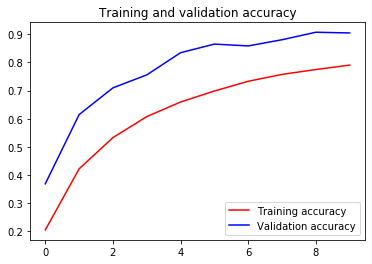

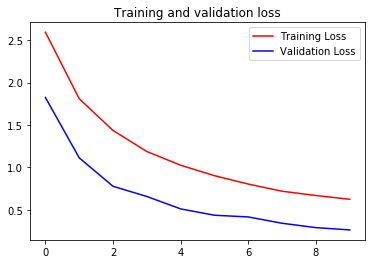

In [8]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [9]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);